<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

In [114]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


<h4>Use scikit-learn library in the following cell</h4>

[[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]
[30.28894834]
Training Dataset Mean squared error: 21.64
Testing Dataset Mean squared error: 24.31


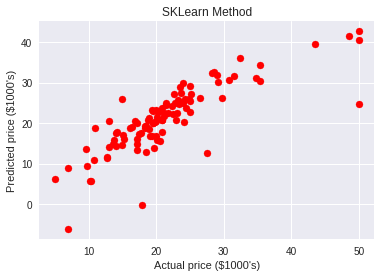

In [115]:
# Task 1-1: use linear regression in sklearn
model = linear_model.LinearRegression()
model.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
print(model.coef_)
print(model.intercept_)

# Task 1-3: show errors on training dataset and testing dataset
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

print("Training Dataset Mean squared error: %.2f" % mean_squared_error(train_predictions, train_target))
print("Testing Dataset Mean squared error: %.2f" % mean_squared_error(test_predictions, test_target))


# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, test_predictions,  color='red')
plt.xlabel('Actual price ($1000\'s)')
plt.ylabel('Predicted price ($1000\'s)')
plt.title('SKLearn Method')

plt.show()


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

[[ 3.02889483e+01]
 [-1.12463481e-01]
 [ 3.00810168e-02]
 [ 4.07309919e-02]
 [ 2.78676719e+00]
 [-1.72406347e+01]
 [ 4.43248784e+00]
 [-6.23998173e-03]
 [-1.44848504e+00]
 [ 2.62113793e-01]
 [-1.06390978e-02]
 [-9.16398679e-01]
 [ 1.24516469e-02]
 [-5.09349120e-01]]
Training Dataset Mean squared error: 21.64
Testing Dataset Mean squared error: 24.31


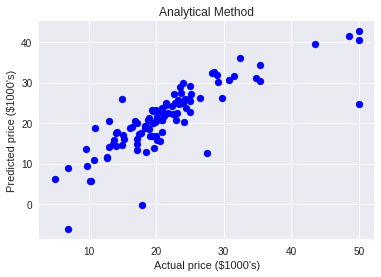

(102, 1)


In [116]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
# 𝑤 = (𝑋t𝑋)-1 𝑋T t

def myNormalEqualFun(X,y):
  first_term = linalg.inv(np.dot(X.T,X))
  second_term = np.dot(X.T, y)
  w = np.dot(first_term,second_term)
  return w
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  predictions = np.dot(X, w.T)
  return predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)


# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents
print(w)

# Task 2-4: show errors on training dataset and testing dataset
analytical_train_prediction = np.dot(train_data_intercept, w)
analytical_test_prediction = np.dot(test_data_intercept, w)

print("Training Dataset Mean squared error: %.2f" % mean_squared_error(analytical_train_prediction, train_target))
print("Testing Dataset Mean squared error: %.2f" % mean_squared_error(analytical_test_prediction, test_target))

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
plt.scatter(test_target, analytical_test_prediction,  color='blue')
plt.xlabel('Actual price ($1000\'s)')
plt.ylabel('Predicted price ($1000\'s)')
plt.title('Analytical Method')

plt.show()

print(analytical_test_prediction.shape)


<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

In [117]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
  w = np.ones([X.shape[1],1])
  
  for x in range(numItrs):
    gradients = np.dot((-1/len(X) * X.T),(y - np.dot(X,w)))
    #print(gradients)
    w = w - (learning_rate * gradients)
  
  return w         
  

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
  predictions = np.dot(X, w.T)
  return predictions

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0.005,50000)

# Task 3-3: show intercept and coefficents
print(w)

# Task 3-4: show errors on training dataset and testing dataset
analytical_train_prediction = myPredictFun(train_data_intercept, w.T)
analytical_test_prediction = myPredictFun(test_data_intercept, w.T)

print("Training Dataset Mean squared error: %.2f" % mean_squared_error(analytical_train_prediction, train_target))
print("Testing Dataset Mean squared error: %.2f" % mean_squared_error(analytical_test_prediction, test_target))


# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset

[[22.79653465]
 [-0.99623198]
 [ 0.69558765]
 [ 0.28047676]
 [ 0.71933959]
 [-2.02678677]
 [ 3.14074201]
 [-0.17447148]
 [-3.08322661]
 [ 2.24869592]
 [-1.76573748]
 [-2.03984932]
 [ 1.13874218]
 [-3.61718126]]
Training Dataset Mean squared error: 21.64
Testing Dataset Mean squared error: 24.31


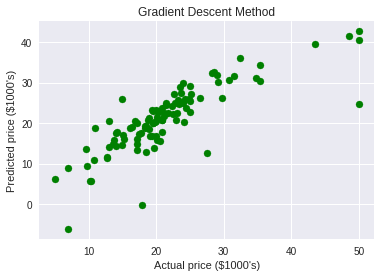

In [118]:
plt.scatter(test_target, analytical_test_prediction,  color='green')
plt.xlabel('Actual price ($1000\'s)')
plt.ylabel('Predicted price ($1000\'s)')
plt.title('Gradient Descent Method')
plt.show()